In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
tensorflow.keras.__version__

'2.2.4-tf'

# Initial baseline model

This is the initial notebook to implement a convolutional network on audio samples

In [4]:
tf.executing_eagerly()
#tf.enable_eager_execution()
tf.keras.backend.clear_session()

# 2 Load Model and Visualize

In [5]:
from tensorflow.keras.models import load_model

model = load_model('bass_drum_3layer_56channel_28dense.h5')
model.summary()  

W0831 17:41:30.984429 10252 deprecation.py:506] From C:\Users\bties\Anaconda3\envs\mlbook\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 17:41:30.984429 10252 deprecation.py:506] From C:\Users\bties\Anaconda3\envs\mlbook\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 17:41:30.985426 10252 deprecation.py:506] From C:\Users\bties\Anaconda3\envs\mlbook\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.i

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 10, 56)       504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 10, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 10, 28)        12572     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 10, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 10, 14)        3150      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 10, 14)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2240)              0

In [6]:
raw_mfcc_enc = []
audio_segment_tensor_list = []
raw_mfcc_enc.append(np.load('f:\\BriansClasses\\audio_segments_sample_5.npy'))
raw_mfcc_enc.append(np.load('f:\\BriansClasses\\audio_segments_sample_8.npy'))
raw_mfcc_enc.append(np.load('f:\\BriansClasses\\audio_segments_last_2_sec_drum.npy'))
raw_mfcc_enc.append(np.load('f:\\BriansClasses\\audio_segments_silence_then_drum_kit_with_cowbell.npy'))
for mfcc_enc in raw_mfcc_enc:
    audio_data_tensor = tf.convert_to_tensor(mfcc_enc, dtype = tf.float32)
    audio_data_tensor = tf.reshape(audio_data_tensor, [128, 10, 1])
    audio_data_tensor = tf.expand_dims(audio_data_tensor, axis = 0)
    audio_segment_tensor_list.append(audio_data_tensor)

In [7]:
from tensorflow.keras import models
activation_list = []
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
for audio_tensor in audio_segment_tensor_list:
    activation_list.append(activation_model.predict(audio_tensor, steps = 1))


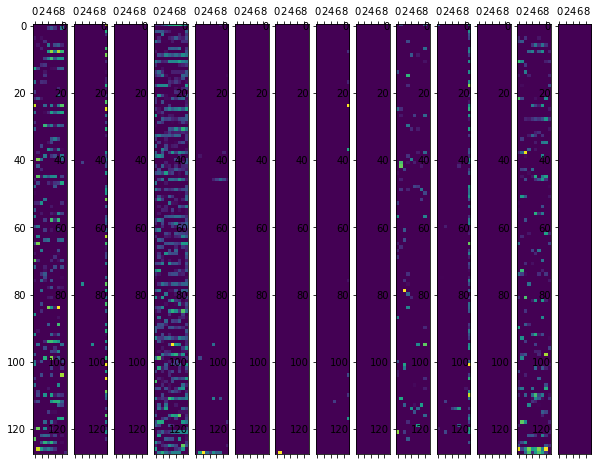

In [12]:
first_layer_activation = activation_list[0][0]

fig = plt.figure(figsize = [10,24])
ax1 = fig.add_subplot(1, 14, 1)
ax1.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
ax2 = fig.add_subplot(1, 14, 2)
ax2.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
ax3 = fig.add_subplot(1, 14, 3)
ax3.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
ax4 = fig.add_subplot(1, 14, 4)
ax4.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
ax5 = fig.add_subplot(1, 14, 5)
ax5.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
ax6 = fig.add_subplot(1, 14, 6)
ax6.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
ax7 = fig.add_subplot(1, 14, 7)
ax7.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
ax8 = fig.add_subplot(1, 14, 8)
ax8.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')
ax9 = fig.add_subplot(1, 14, 9)
ax9.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')
ax10 = fig.add_subplot(1, 14, 10)
ax10.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
ax11 = fig.add_subplot(1, 14, 11)
ax11.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')
ax12 = fig.add_subplot(1, 14, 12)
ax12.matshow(first_layer_activation[0, :, :, 27], cmap='viridis')
ax13 = fig.add_subplot(1, 14, 13)
ax13.matshow(first_layer_activation[0, :, :, 28], cmap='viridis')
ax14 = fig.add_subplot(1, 14, 14)
ax14.matshow(first_layer_activation[0, :, :, 32], cmap='viridis')
plt.show()

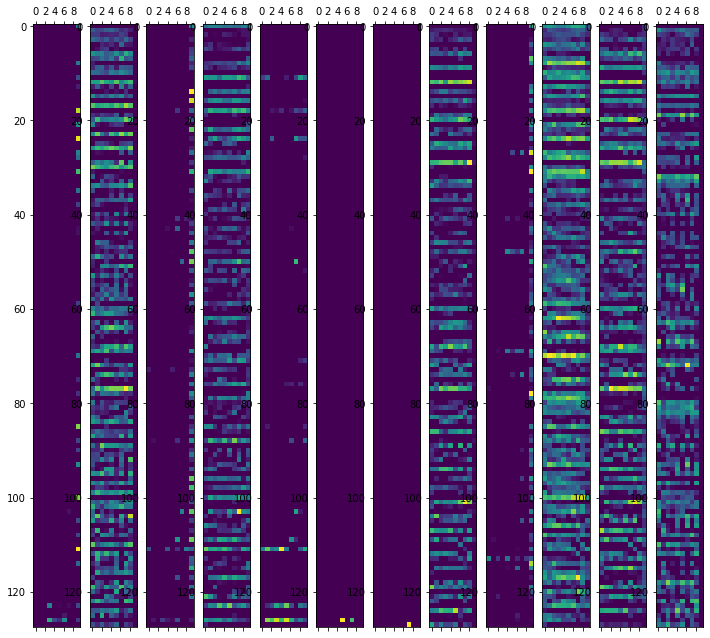

In [10]:
first_layer_activation = activation_list[1][0]

fig = plt.figure(figsize = [12,24])
ax1 = fig.add_subplot(1, 12, 1)
ax1.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
ax2 = fig.add_subplot(1, 12, 2)
ax2.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
ax3 = fig.add_subplot(1, 12, 3)
ax3.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
ax4 = fig.add_subplot(1, 12, 4)
ax4.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
ax5 = fig.add_subplot(1, 12, 5)
ax5.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
ax6 = fig.add_subplot(1, 12, 6)
ax6.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
ax7 = fig.add_subplot(1, 12, 7)
ax7.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
ax8 = fig.add_subplot(1, 12, 8)
ax8.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')
ax9 = fig.add_subplot(1, 12, 9)
ax9.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')
ax10 = fig.add_subplot(1, 12, 10)
ax10.matshow(first_layer_activation[0, :, :, 39], cmap='viridis')
ax11 = fig.add_subplot(1, 12, 11)
ax11.matshow(first_layer_activation[0, :, :, 42], cmap='viridis')
ax12 = fig.add_subplot(1, 12, 12)
ax12.matshow(first_layer_activation[0, :, :, 53], cmap='viridis')
plt.show()

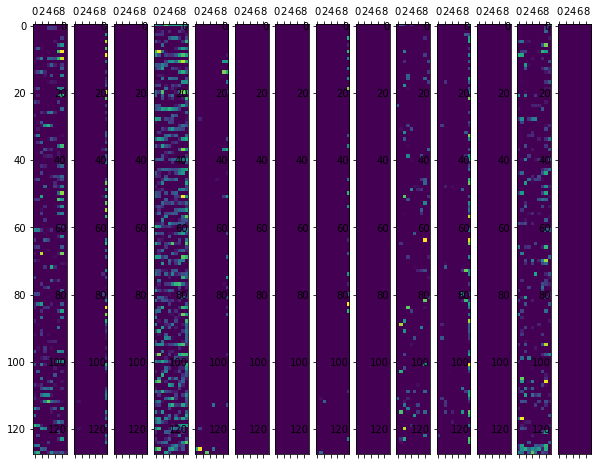

In [14]:
first_layer_activation = activation_list[2][0]

fig = plt.figure(figsize = [10,24])
ax1 = fig.add_subplot(1, 14, 1)
ax1.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
ax2 = fig.add_subplot(1, 14, 2)
ax2.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
ax3 = fig.add_subplot(1, 14, 3)
ax3.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
ax4 = fig.add_subplot(1, 14, 4)
ax4.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
ax5 = fig.add_subplot(1, 14, 5)
ax5.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
ax6 = fig.add_subplot(1, 14, 6)
ax6.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
ax7 = fig.add_subplot(1, 14, 7)
ax7.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
ax8 = fig.add_subplot(1, 14, 8)
ax8.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')
ax9 = fig.add_subplot(1, 14, 9)
ax9.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')
ax10 = fig.add_subplot(1, 14, 10)
ax10.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
ax11 = fig.add_subplot(1, 14, 11)
ax11.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')
ax12 = fig.add_subplot(1, 14, 12)
ax12.matshow(first_layer_activation[0, :, :, 27], cmap='viridis')
ax13 = fig.add_subplot(1, 14, 13)
ax13.matshow(first_layer_activation[0, :, :, 28], cmap='viridis')
ax14 = fig.add_subplot(1, 14, 14)
ax14.matshow(first_layer_activation[0, :, :, 32], cmap='viridis')
plt.show()

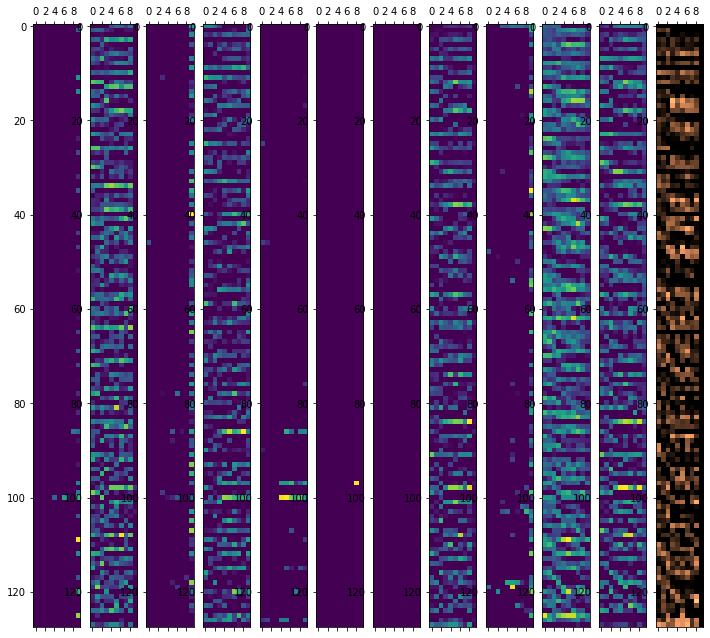

In [17]:
first_layer_activation = activation_list[3][0]

fig = plt.figure(figsize = [12,24])
ax1 = fig.add_subplot(1, 12, 1)
ax1.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
ax2 = fig.add_subplot(1, 12, 2)
ax2.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
ax3 = fig.add_subplot(1, 12, 3)
ax3.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
ax4 = fig.add_subplot(1, 12, 4)
ax4.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
ax5 = fig.add_subplot(1, 12, 5)
ax5.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
ax6 = fig.add_subplot(1, 12, 6)
ax6.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
ax7 = fig.add_subplot(1, 12, 7)
ax7.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
ax8 = fig.add_subplot(1, 12, 8)
ax8.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')
ax9 = fig.add_subplot(1, 12, 9)
ax9.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')
ax10 = fig.add_subplot(1, 12, 10)
ax10.matshow(first_layer_activation[0, :, :, 39], cmap='viridis')
ax11 = fig.add_subplot(1, 12, 11)
ax11.matshow(first_layer_activation[0, :, :, 42], cmap='viridis')
ax12 = fig.add_subplot(1, 12, 12)
ax12.matshow(first_layer_activation[0, :, :, 53], cmap='copper')
plt.show()

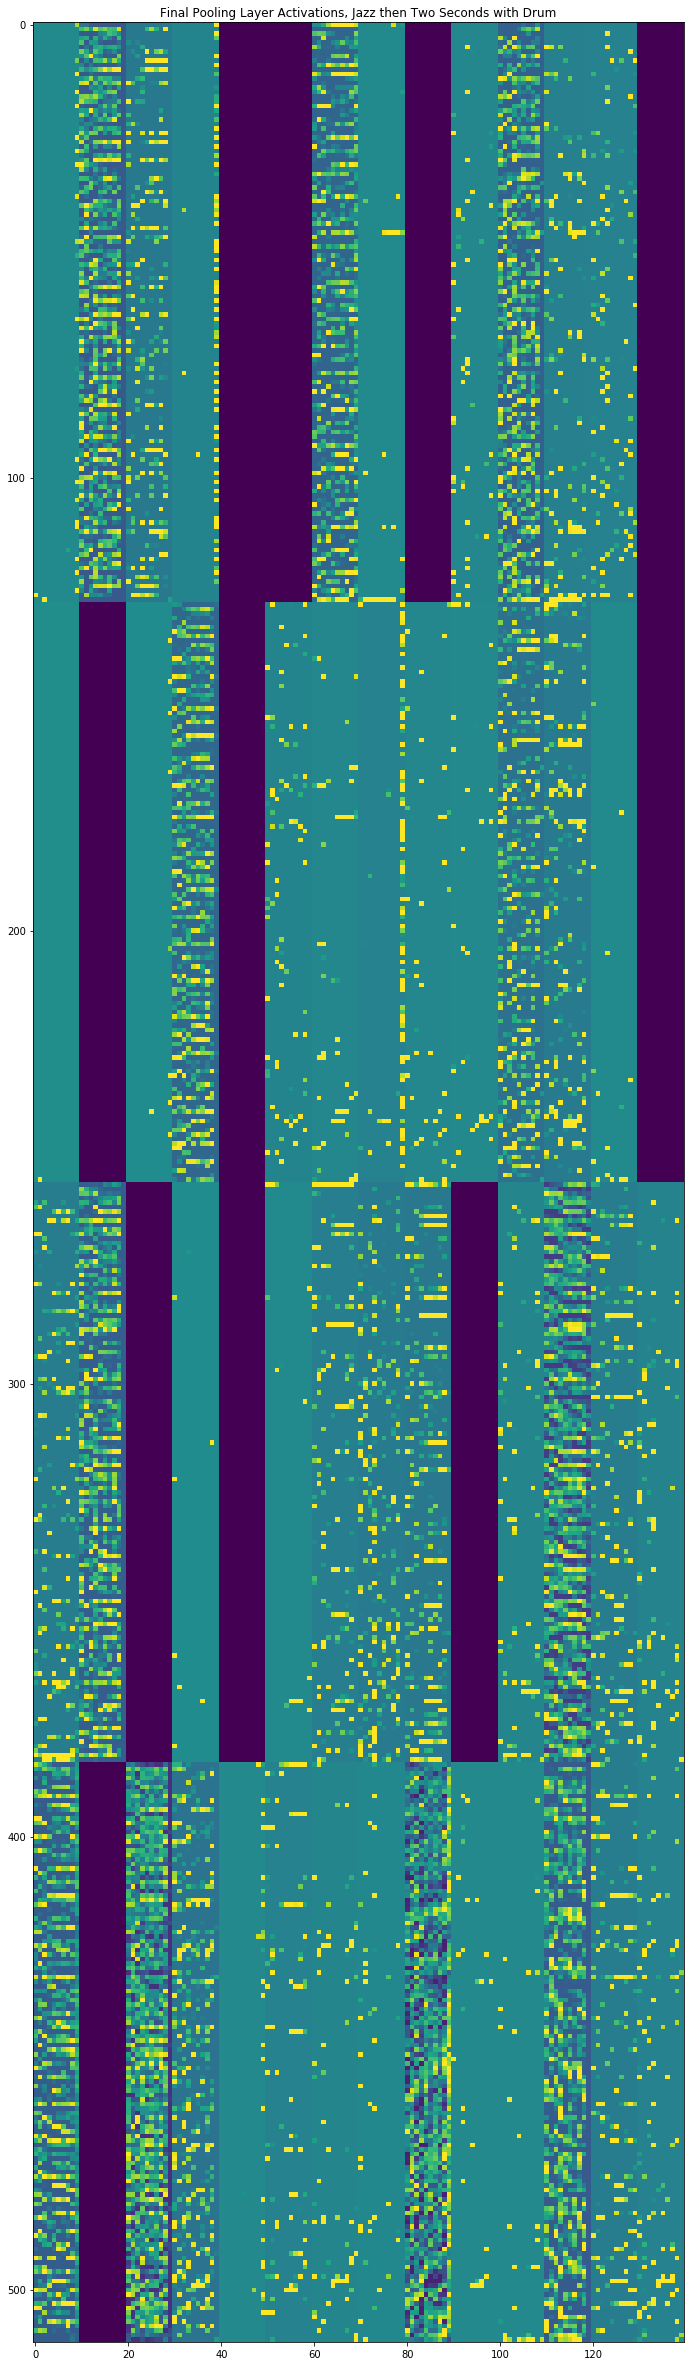

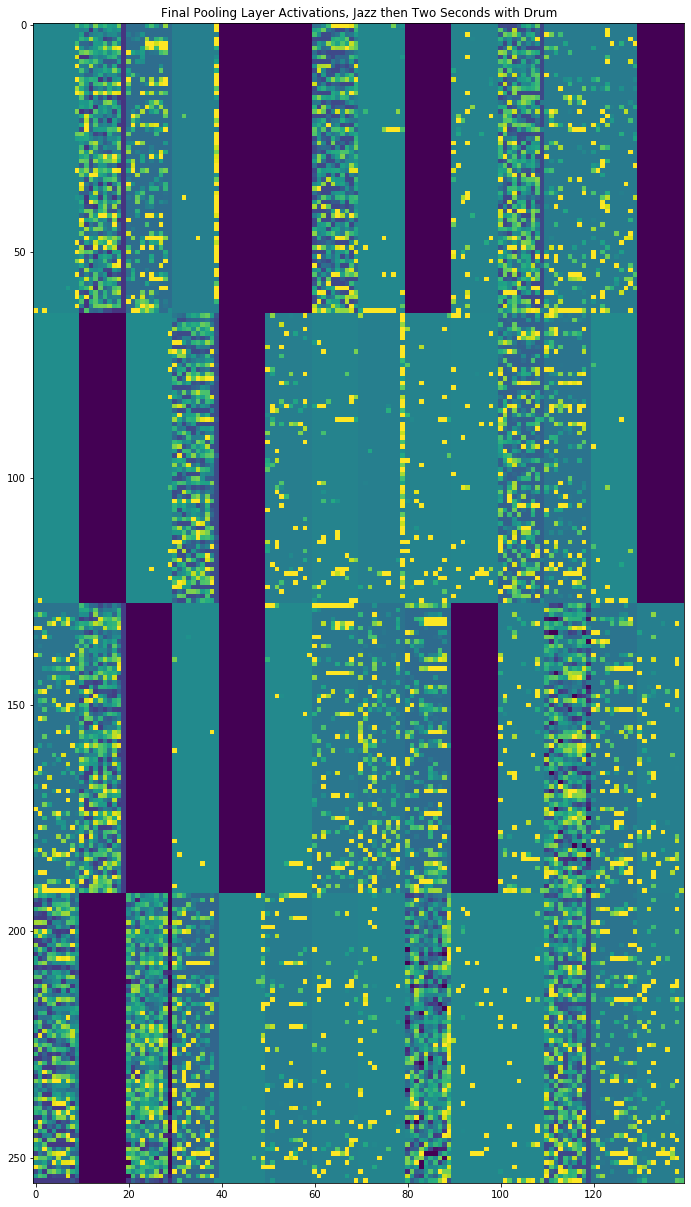

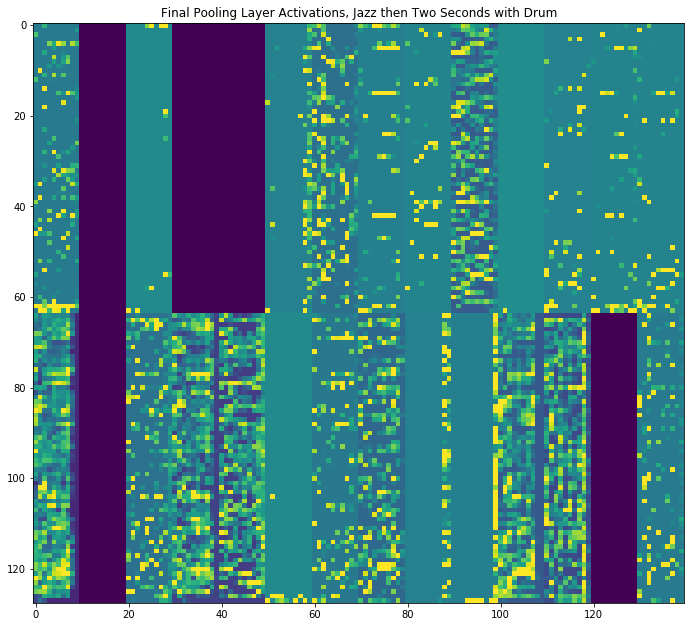

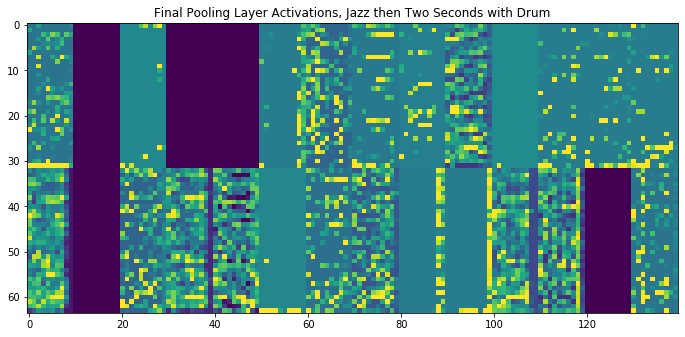

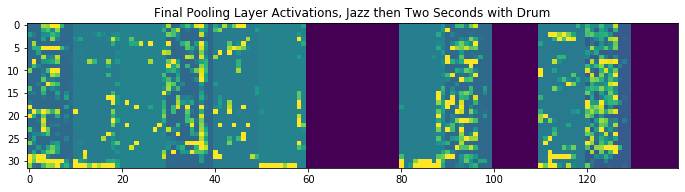

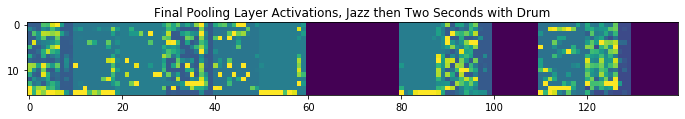

In [23]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 14


# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activation_list[0]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, height, width, n_features)
    height = layer_activation.shape[1]
    width = 10

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((height * n_cols, images_per_row * width))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * height : (col + 1) * height,
                         row * width : (row + 1) * width] = channel_image

    # Display the grid
    scale = 1. / 12
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title("Final Pooling Layer Activations, Jazz then Two Seconds with Drum")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

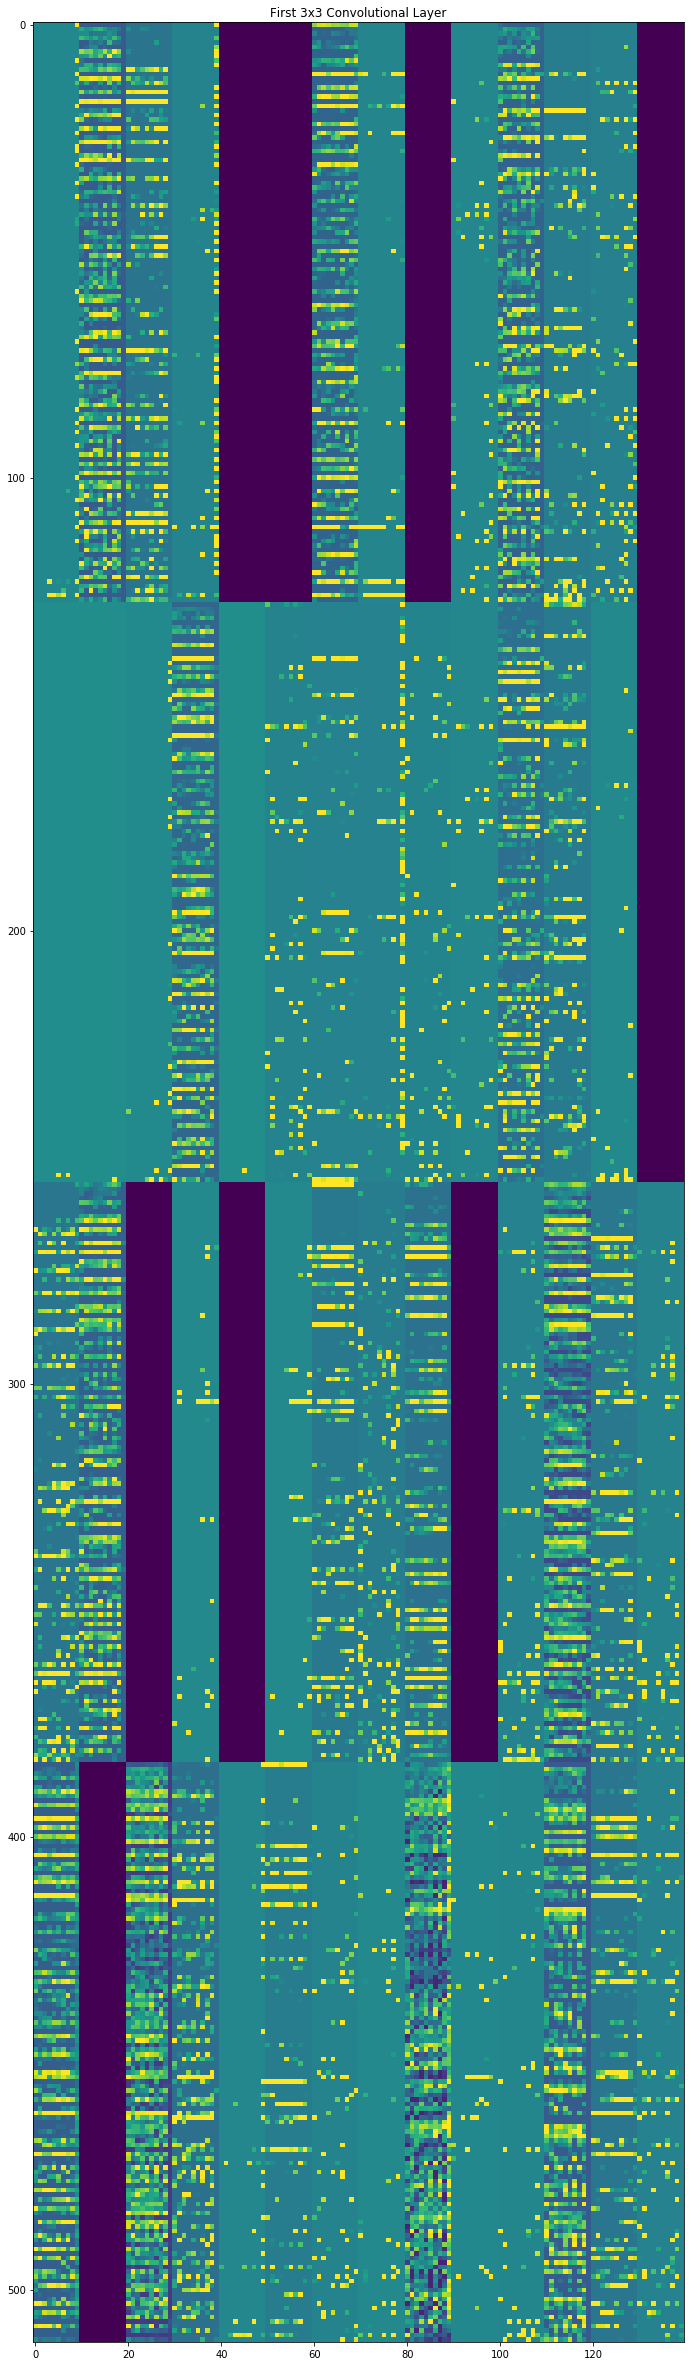

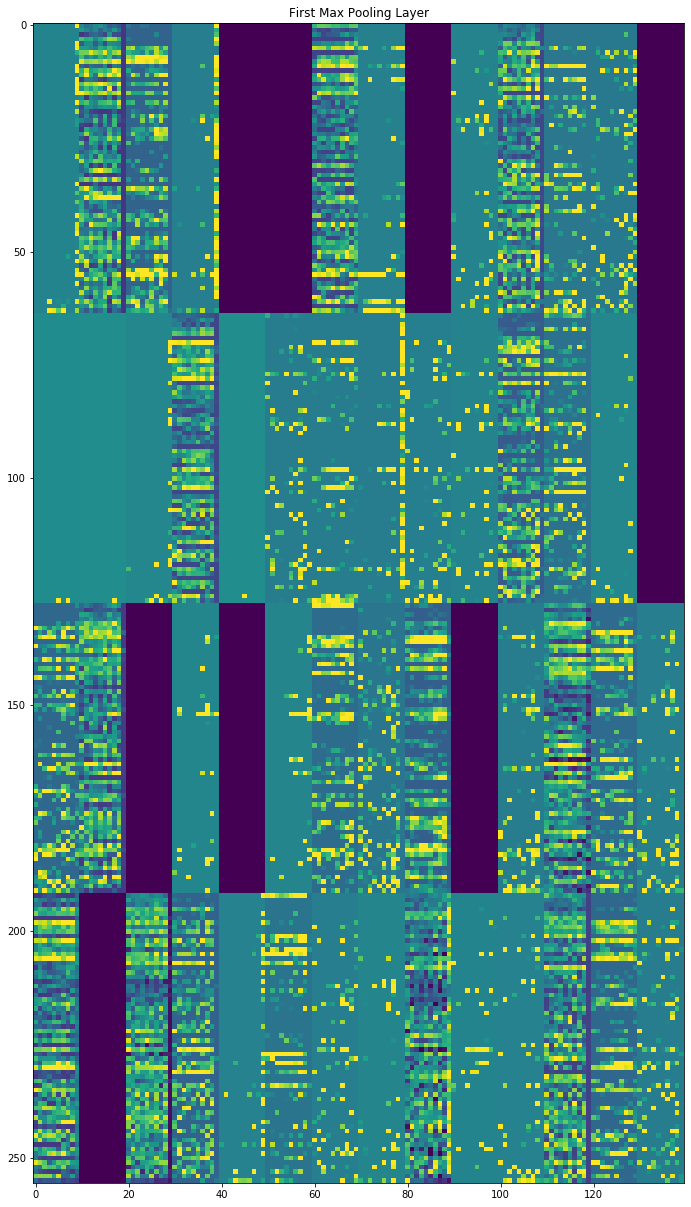

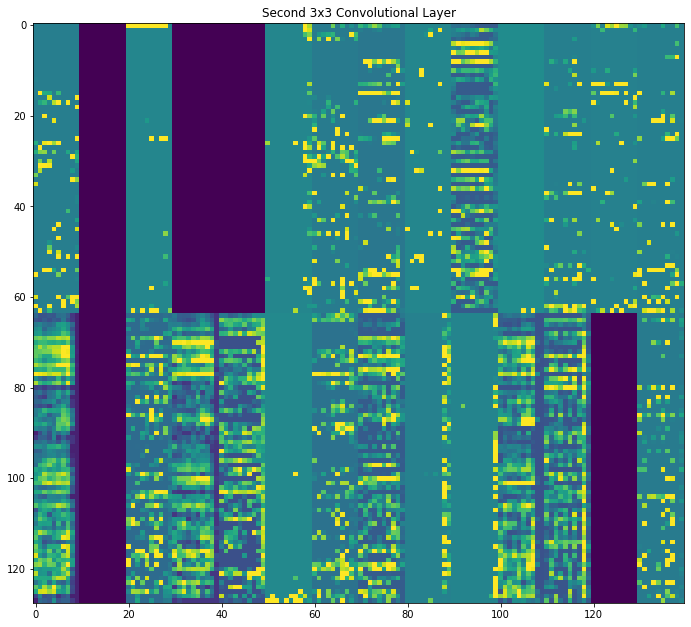

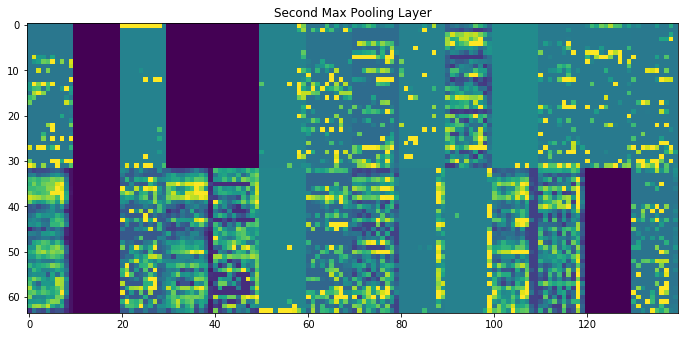

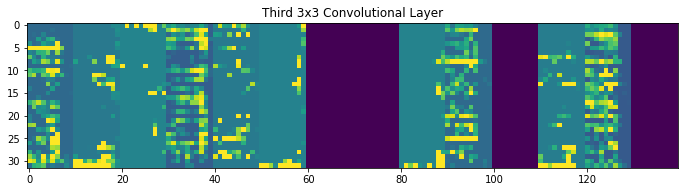

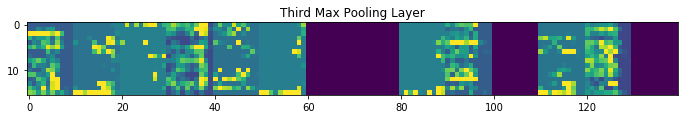

In [25]:
# Now let's display our feature maps
layer_name_list = []
layer_name_list.append("First 3x3 Convolutional Layer")
layer_name_list.append("First Max Pooling Layer")
layer_name_list.append("Second 3x3 Convolutional Layer")
layer_name_list.append("Second Max Pooling Layer")
layer_name_list.append("Third 3x3 Convolutional Layer")
layer_name_list.append("Third Max Pooling Layer")

for layer_name, layer_activation in zip(layer_name_list, activation_list[1]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, height, width, n_features)
    height = layer_activation.shape[1]
    width = 10

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((height * n_cols, images_per_row * width))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * height : (col + 1) * height,
                         row * width : (row + 1) * width] = channel_image

    # Display the grid
    scale = 1. / 12
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

C:\Users\bties\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


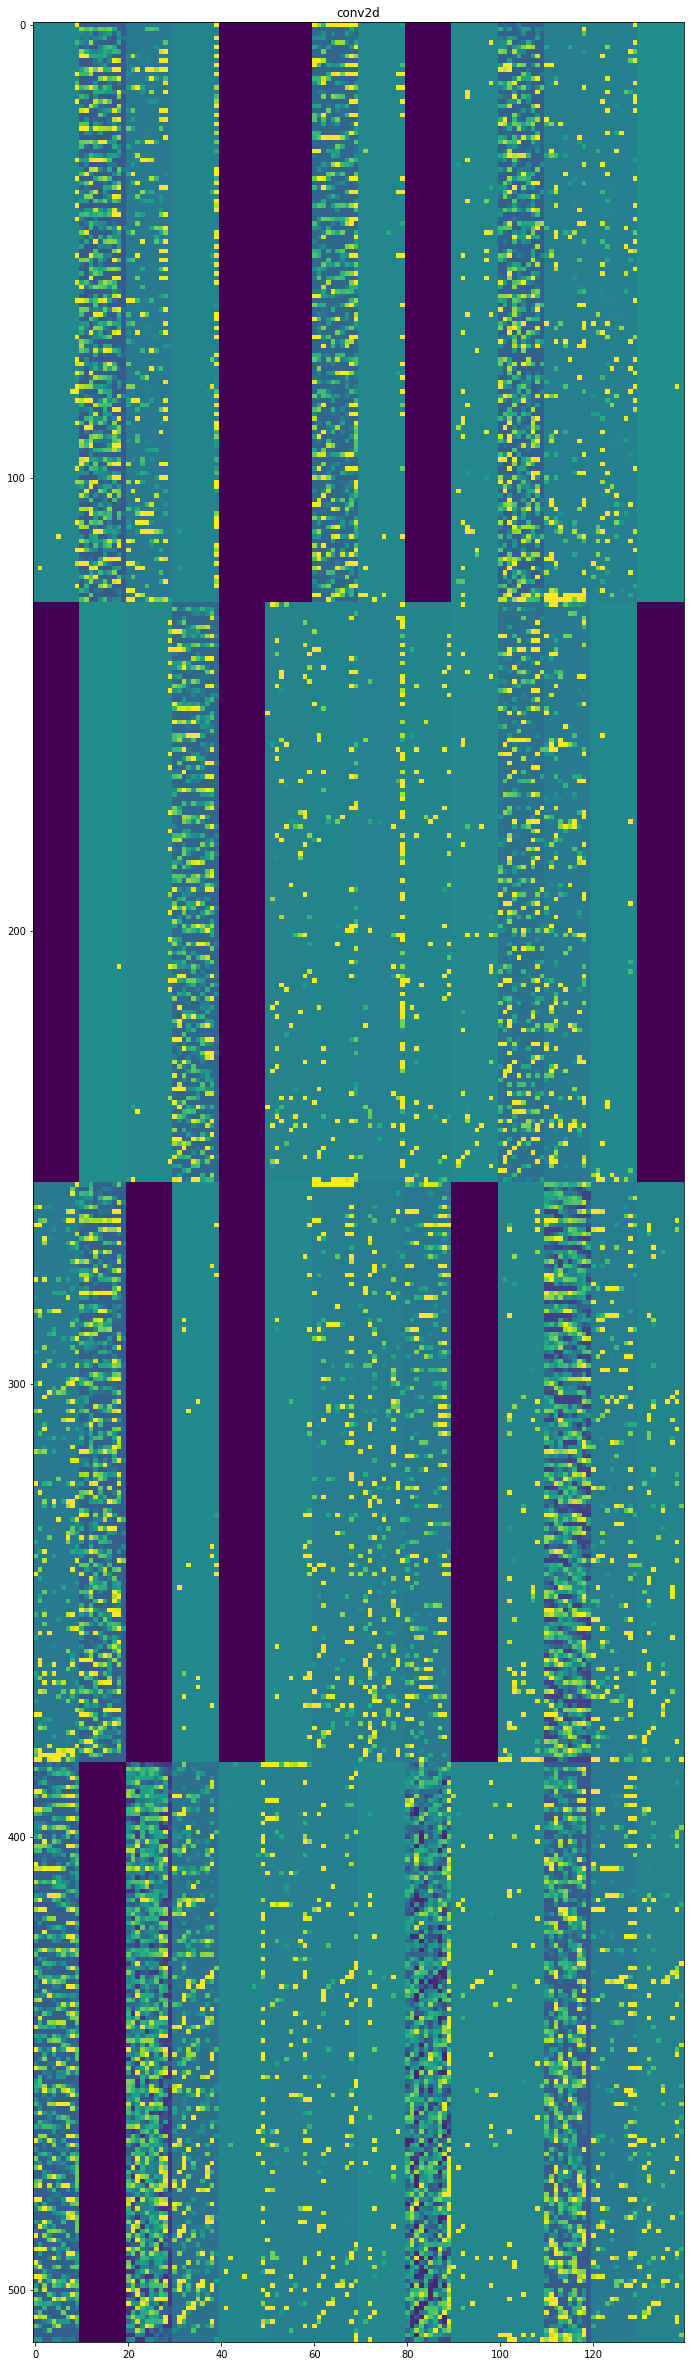

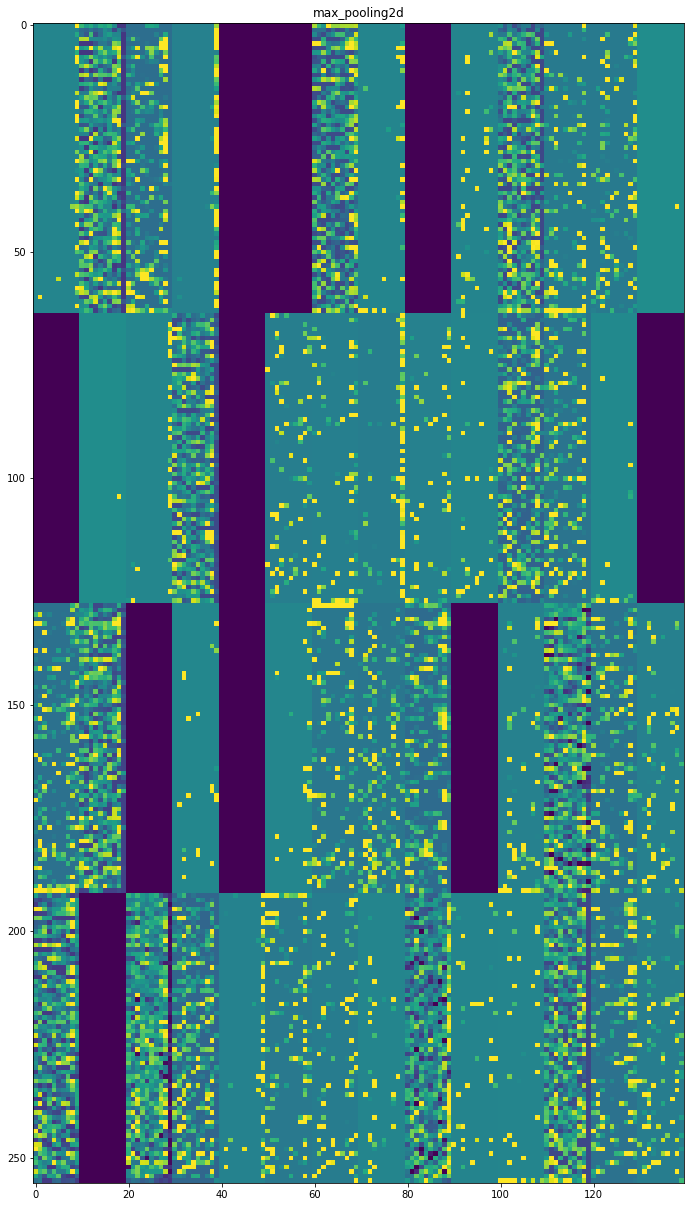

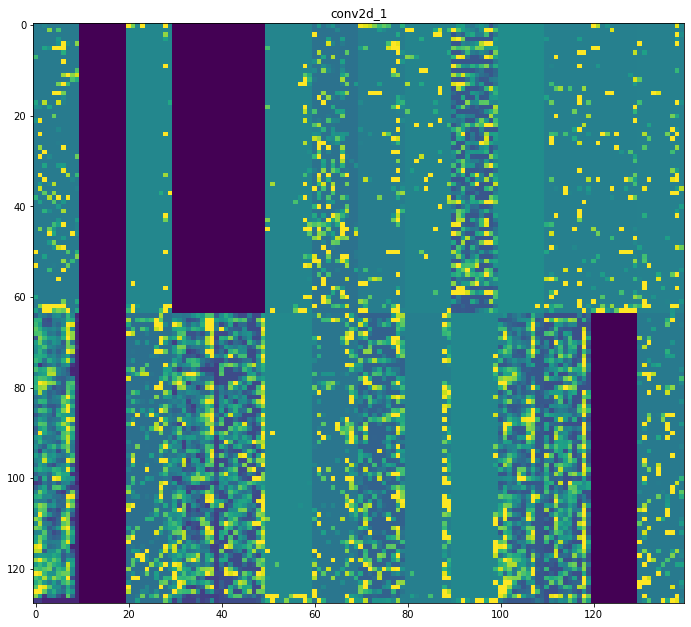

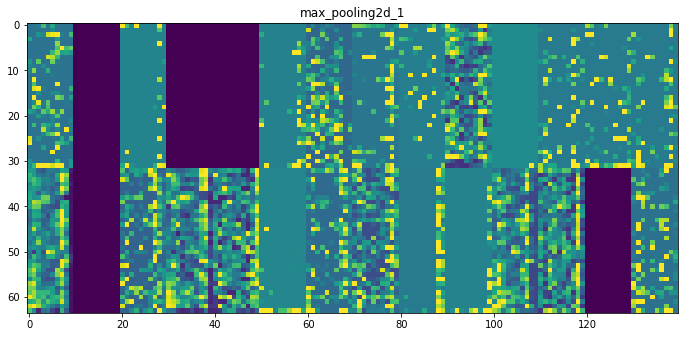

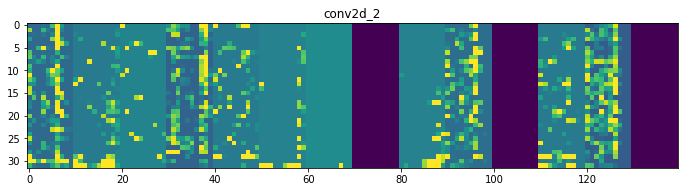

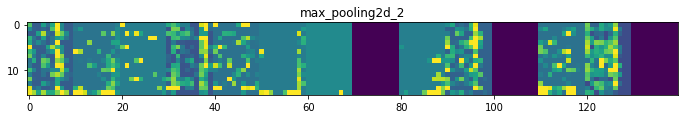

In [21]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activation_list[2]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, height, width, n_features)
    height = layer_activation.shape[1]
    width = 10

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((height * n_cols, images_per_row * width))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * height : (col + 1) * height,
                         row * width : (row + 1) * width] = channel_image

    # Display the grid
    scale = 1. / 12
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

C:\Users\bties\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


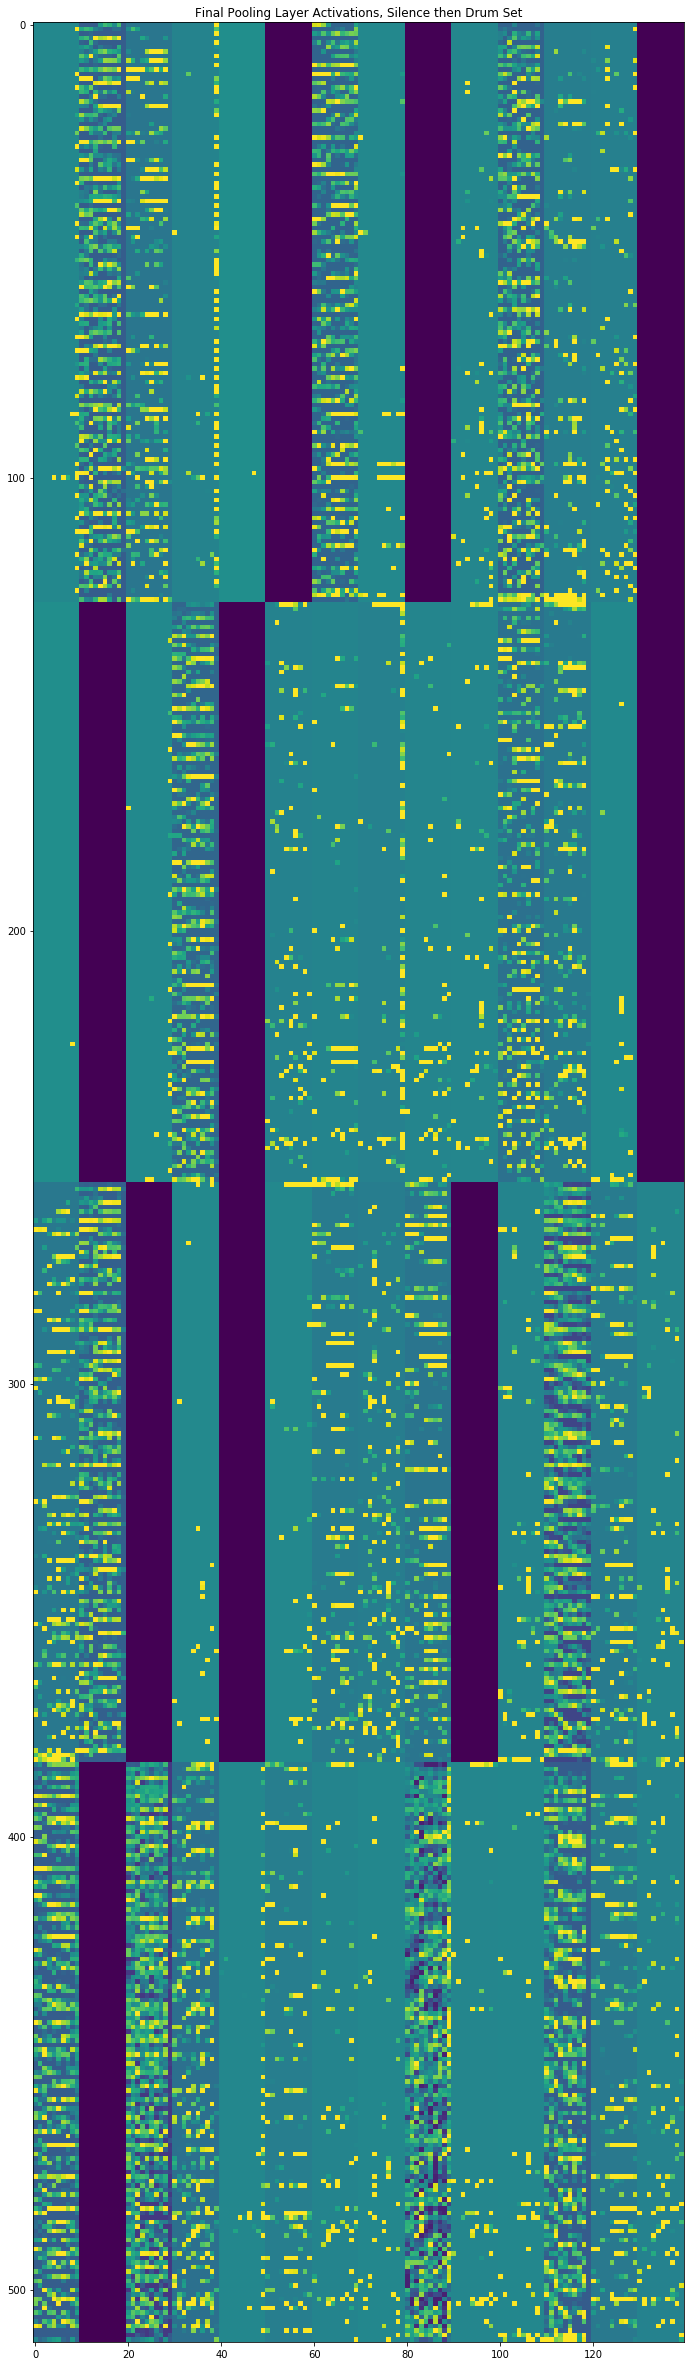

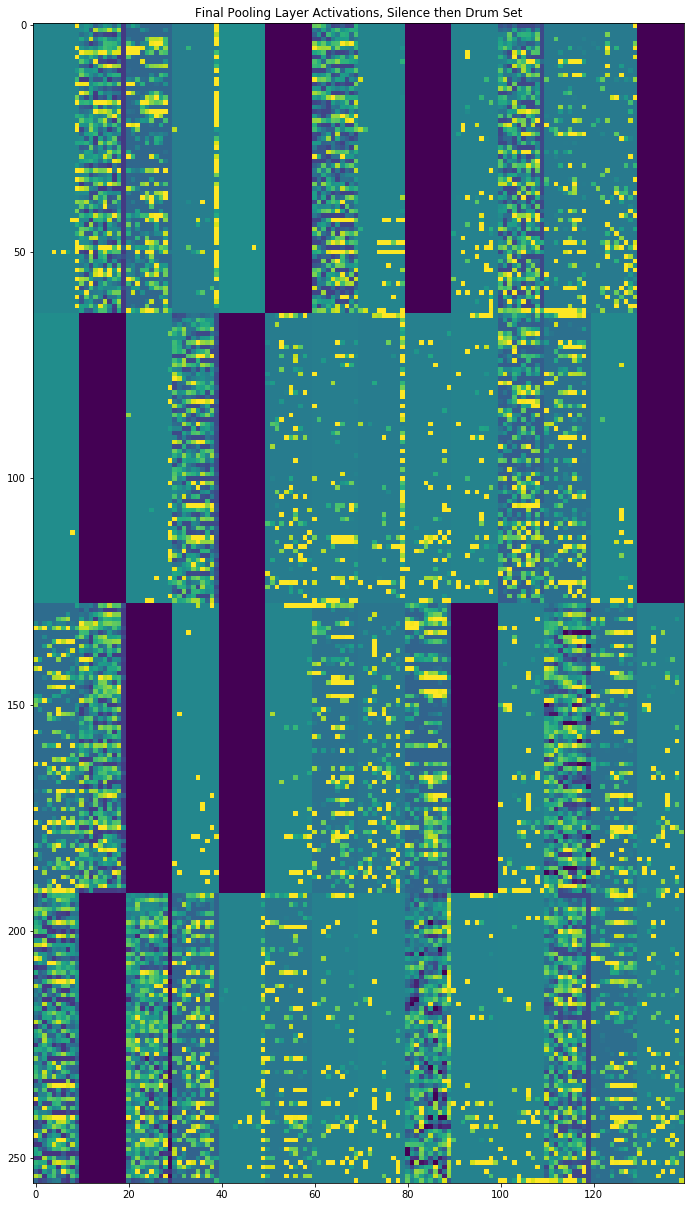

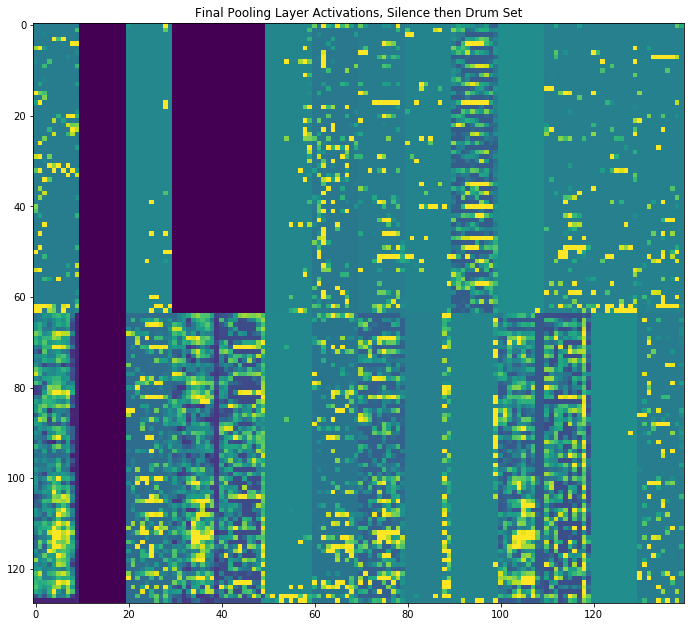

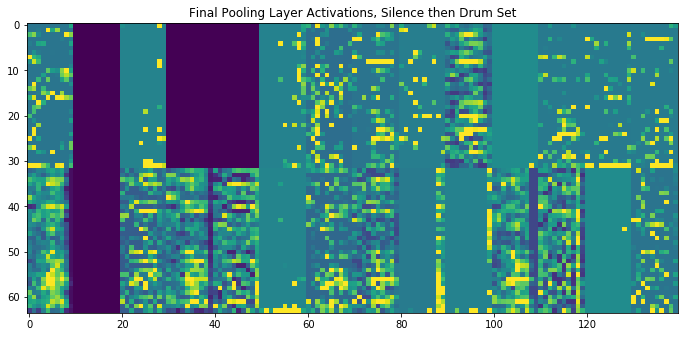

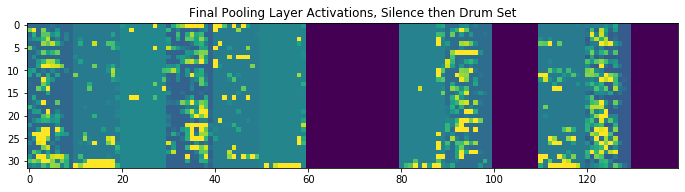

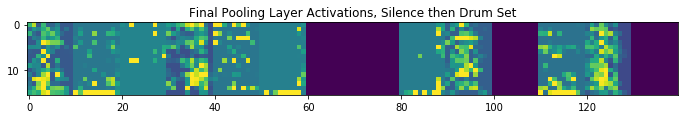

In [22]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activation_list[3]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, height, width, n_features)
    height = layer_activation.shape[1]
    width = 10

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((height * n_cols, images_per_row * width))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * height : (col + 1) * height,
                         row * width : (row + 1) * width] = channel_image

    # Display the grid
    scale = 1. / 12
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title("Final Pooling Layer Activations, Silence then Drum Set")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()